In [1]:
import os
import pandas as pd
import numpy as np
import joblib
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor

In [2]:
X_train = pd.read_csv('C:\\Users\\THIS PC\\Desktop\\apartment-price-prediction\\data\\finalized\\X_train.csv')
y_train = pd.read_csv('C:\\Users\\THIS PC\\Desktop\\apartment-price-prediction\\data\\finalized\\y_train.csv').values.ravel()
preprocessor = joblib.load('C:\\Users\\THIS PC\\Desktop\\apartment-price-prediction\\model\\feature_engineering\\preprocessor.pkl')
X_train_transformed = preprocessor.transform(X_train)
feature_names = preprocessor.get_feature_names_out()

In [3]:
# 1. Huấn luyện SVR
print("Training SVR...")
svr_model = LinearSVR(C= 10)
svr_model.fit(X_train_transformed, y_train)

# Tính tầm quan trọng từ hệ số mô hình
svr_feature_importance = np.abs(svr_model.coef_)
svr_feature_importance_normalized = svr_feature_importance / np.sum(svr_feature_importance)

# 2. Huấn luyện XGBoost
print("Training XGBoost...")
xgb_model = XGBRegressor(
    n_estimators=800,
    learning_rate=0.2,
    max_depth=9
)
xgb_model.fit(X_train_transformed, y_train)

# Tầm quan trọng từ XGBoost
xgb_feature_importance = xgb_model.feature_importances_


Training SVR...


c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training XGBoost...



Top 10 Features by XGBoost:
                                 Feature  Importance
19            cat__District_Quận Hà Đông    0.044237
15           cat__District_Quận Cầu Giấy    0.018516
642                    cat__duAn_NO INFO    0.014649
18          cat__District_Quận Hoàng Mai    0.014576
22         cat__District_Quận Thanh Xuân    0.013582
14        cat__District_Quận Bắc Từ Liêm    0.013483
20          cat__District_Quận Long Biên    0.011860
23             cat__District_Quận Tây Hồ    0.011299
21        cat__District_Quận Nam Từ Liêm    0.010347
200       cat__Precinct_Phường Đức Giang    0.010283
141  cat__Precinct_Phường Thanh Xuân Bắc    0.010242
898               cat__duAn_Viha Complex    0.009755
24            cat__District_Quận Đống Đa    0.009651
9          cat__District_Huyện Thanh Trì    0.009258
16       cat__District_Quận Hai Bà Trưng    0.007866

Top 10 Features by SVR:
                                Feature  Importance
928                 cat__duAn_Watermark    0.0

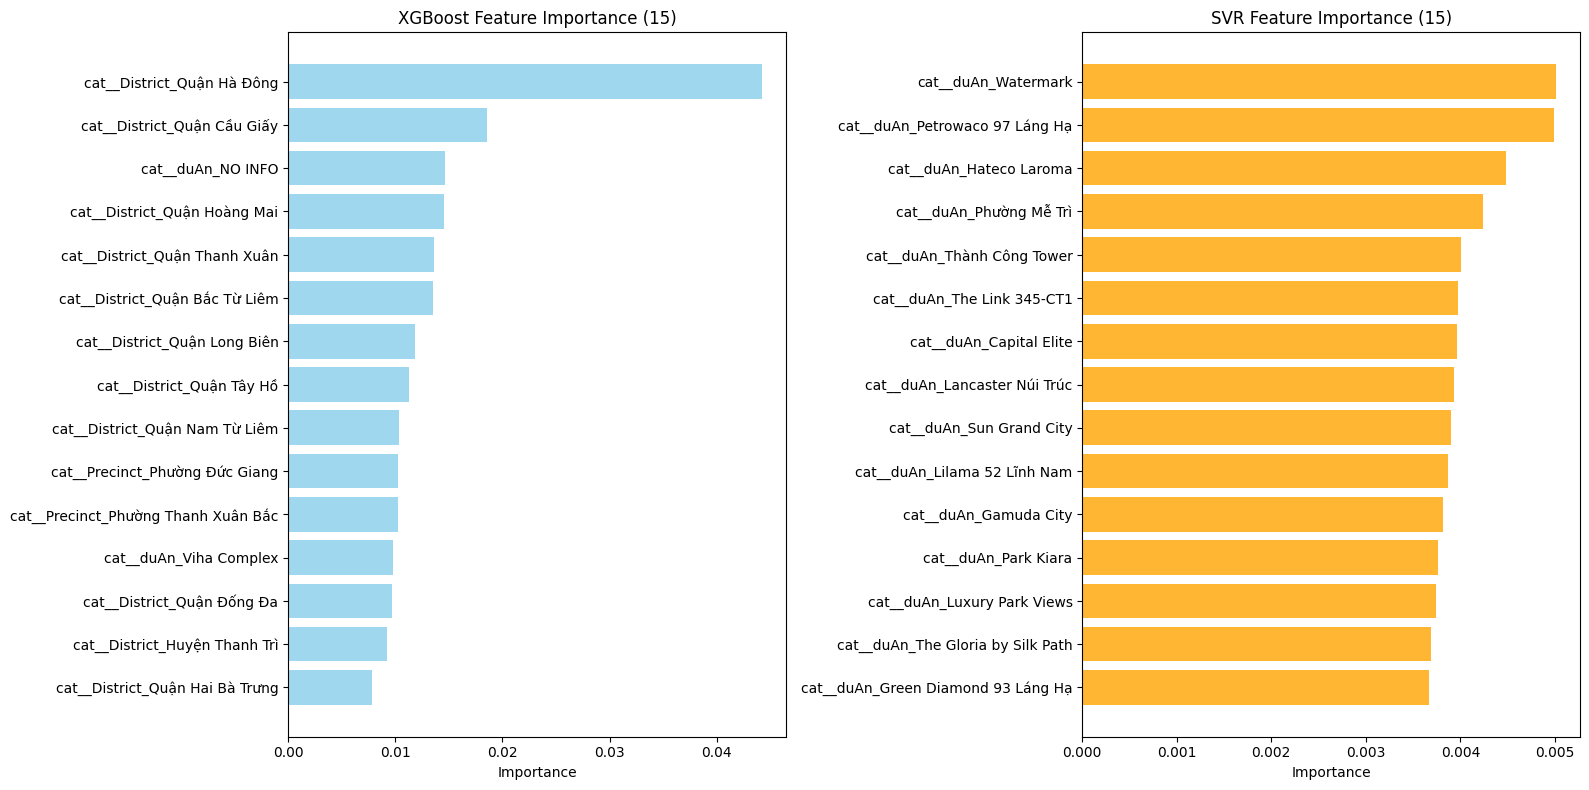

In [9]:
# 3. Kết hợp và lọc top 10 thuộc tính
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_feature_importance
}).sort_values(by='Importance', ascending=False).head(15)

svr_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': svr_feature_importance_normalized
}).sort_values(by='Importance', ascending=False).head(15)

# 4. Hiển thị bảng và vẽ biểu đồ
print("\nTop 10 Features by XGBoost:")
print(xgb_importance_df)

print("\nTop 10 Features by SVR:")
print(svr_importance_df)

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Biểu đồ XGBoost
axes[0].barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color='skyblue', alpha=0.8)
axes[0].set_title("XGBoost Feature Importance (15)")
axes[0].invert_yaxis()
axes[0].set_xlabel("Importance")

# Biểu đồ SVR
axes[1].barh(svr_importance_df['Feature'], svr_importance_df['Importance'], color='orange', alpha=0.8)
axes[1].set_title("SVR Feature Importance (15)")
axes[1].invert_yaxis()
axes[1].set_xlabel("Importance")

plt.tight_layout()
plt.show()